# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

##### Who: 
The "Who" would include marketing managers, digital campaign strategist, customer analytics teams, or executives. 
These are individuals that may want more personalized marketing campaigns, reduce churn, and retain high-value customers. 

##### What: 
The "What" is to aim to understand what customer attributes and behaviors are the most predictive of value, conversion, and churn. 

##### How: 
The "How" is the use of EDA to uncover trends in spending, response and churn along with building various classification models to predict the likelihood of churn and conversion. 

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 3. Homework - work with your own data

In [21]:
import pandas as pd
import numpy as np
import kagglehub
import os
from datetime import datetime, timedelta

# Digital Marketing Project: Predicting Customer Value, Conversion, and Churn 

## Datasets: 

### 1. Marketing Campaign Dataset - https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data
### 2. Customer Churn Dataset - https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
### 3. Predict Conversion in Digital Marketing Dataset -https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/data


In [22]:
from dotenv import load_dotenv

load_dotenv()

# Set Kaggle credentials for API use
os.environ['KAGGLE_USERNAME'] = os.getenv("KAGGLE_USERNAME")
os.environ['KAGGLE_KEY'] = os.getenv("KAGGLE_KEY")

### Marketing Campaign Dataset EDA

In [59]:
#download the dataset from Kaggle
marketing_dataset_path = kagglehub.dataset_download("rodsaldanha/arketing-campaign")
print("Path to dataset files:", marketing_dataset_path)


# Define the path to the dataset file
marketing_dataset_path_to_file = os.path.join(marketing_dataset_path, "marketing_campaign.csv")

# Load the dataset
marketing_dataset_raw = pd.read_csv(marketing_dataset_path_to_file, sep=';')

# Preview the data
marketing_dataset_raw.head()


Path to dataset files: C:\Users\jalva\.cache\kagglehub\datasets\rodsaldanha\arketing-campaign\versions\8


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


####  Marketing Campaign Dataset Summary 

In [60]:
# Display the shape of the dataset
print("Shape of the dataset:", marketing_dataset_raw.shape)
print("\n" + "-" * 50 + "\n")

#display info
print("Information about the dataset:")
marketing_dataset_raw.info()

# summary statistics
print("\n" + "-" * 50 + "\n")
print("Summary statistics of the dataset:")

print(marketing_dataset_raw.describe())

#summary of categorical variables
print("\n" + "-" * 50 + "\n")
print("Summary of categorical variables:")
marketing_dataset_raw.describe(include='object')


Shape of the dataset: (2240, 29)

--------------------------------------------------

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


#### Marketing Missing Values or Duplicate Rows

In [61]:
marketing_duplicates = marketing_dataset_raw.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {marketing_duplicates}")

#check for missing values
missing_values = marketing_dataset_raw.isnull().sum()
print("Missing values in each column:" + "\n" + missing_values.to_string())

Number of duplicate rows in the dataset: 0
Missing values in each column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0


#### Marketing Mean, Median, Mode Marketing Data

In [62]:
#calculate mean, median, and mode for numerical columns

marketing_numerical_columns = marketing_dataset_raw.select_dtypes(include=[np.number]).columns

means = marketing_dataset_raw[marketing_numerical_columns].mean()
medians = marketing_dataset_raw[marketing_numerical_columns].median()
modes = marketing_dataset_raw[marketing_numerical_columns].mode().iloc[0]

marketing_summary_statistics = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

print("\nSummary statistics for numerical columns:")
print(marketing_summary_statistics)


Summary statistics for numerical columns:
                             Mean   Median    Mode
ID                    5592.159821   5458.5     0.0
Year_Birth            1968.805804   1970.0  1976.0
Income               52247.251354  51381.5  7500.0
Kidhome                  0.444196      0.0     0.0
Teenhome                 0.506250      0.0     0.0
Recency                 49.109375     49.0    56.0
MntWines               303.935714    173.5     2.0
MntFruits               26.302232      8.0     0.0
MntMeatProducts        166.950000     67.0     7.0
MntFishProducts         37.525446     12.0     0.0
MntSweetProducts        27.062946      8.0     0.0
MntGoldProds            44.021875     24.0     1.0
NumDealsPurchases        2.325000      2.0     1.0
NumWebPurchases          4.084821      4.0     2.0
NumCatalogPurchases      2.662054      2.0     0.0
NumStorePurchases        5.790179      5.0     3.0
NumWebVisitsMonth        5.316518      6.0     7.0
AcceptedCmp3             0.072768      

### Customer Churn Dataset EDA 



In [63]:
#import dataset from kaggle 
churn_dataset_path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")
print("Path to dataset files:", churn_dataset_path)

# Define the path to the dataset file
churn_dataset_path_to_file = os.path.join(churn_dataset_path, "customer_churn_dataset-training-master.csv")

# Load the dataset
churn_dataset_raw = pd.read_csv(churn_dataset_path_to_file)

# Preview the data
churn_dataset_raw.head()

Path to dataset files: C:\Users\jalva\.cache\kagglehub\datasets\muhammadshahidazeem\customer-churn-dataset\versions\1


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


#### Churn Dataset Summary 

In [45]:
#shape of the dataset
print("Shape of the dataset:", churn_dataset_raw.shape)
#info of the dataset
print("\n" + "-" * 50 + "\n")

print("Information about the dataset: \n")
churn_dataset_raw.info()

# summary statistics
print("\n" + "-" * 50 + "\n")
print("Summary statistics of the dataset:")
print(churn_dataset_raw.describe())

#summary of categorical variables
print("\n" + "-" * 50 + "\n")
print("Summary of categorical variables:")
print(churn_dataset_raw.describe(include='object'))


Shape of the dataset: (440833, 12)

--------------------------------------------------

Information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB

----------------------------

####  Churn Missing Values or Duplicate Rows 

In [51]:
# check for duplicate rows
churn_duplicates = churn_dataset_raw.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {churn_duplicates}")

#check for missing values
missing_values = churn_dataset_raw.isnull().sum()
print("Missing values in each column:" + "\n" + missing_values.to_string())

#drop rows with missing values
churn_dataset_cleaned = churn_dataset_raw.dropna()

#check for missing values again
missing_values_cleaned = churn_dataset_cleaned.isnull().sum()
print("\nMissing values after cleaning:" + "\n" + missing_values_cleaned.to_string())


Number of duplicate rows in the dataset: 0
Missing values in each column:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1

Missing values after cleaning:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0


#### Churn Mean, Median, and Mode

In [52]:
#calculate mean, median, and mode for numerical columns in churn dataset
churn_numerical_columns = churn_dataset_cleaned.select_dtypes(include=[np.number]).columns

means_churn = churn_dataset_cleaned[churn_numerical_columns].mean()
medians_churn = churn_dataset_cleaned[churn_numerical_columns].median()
modes_churn = churn_dataset_cleaned[churn_numerical_columns].mode().iloc[0]

churn_summary_statistics = pd.DataFrame({
    'Mean': means_churn,
    'Median': medians_churn,
    'Mode': modes_churn
})

print("\nSummary statistics for numerical columns in churn dataset:")
print(churn_summary_statistics)


Summary statistics for numerical columns in churn dataset:
                           Mean    Median   Mode
CustomerID        225398.667955  226125.5    2.0
Age                   39.373153      39.0   50.0
Tenure                31.256336      32.0   32.0
Usage Frequency       15.807494      16.0   11.0
Support Calls          3.604437       3.0    0.0
Payment Delay         12.965722      12.0   12.0
Total Spend          631.616223     661.0  234.0
Last Interaction      14.480868      14.0    7.0
Churn                  0.567107       1.0    1.0


### Conversion Dataset EDA

In [ ]:
# import predict conversion dataset from Kaggle
predict_conversion_dataset_path = kagglehub.dataset_download("rabieelkharoua/predict-conversion-in-digital-marketing-dataset")

print("Path to dataset files:", predict_conversion_dataset_path)

# Define the path to the dataset file
predict_conversion_dataset_path_to_file = os.path.join(predict_conversion_dataset_path, "digital_marketing_campaign_dataset.csv")

# Load the dataset
predict_conversion_dataset_raw = pd.read_csv(predict_conversion_dataset_path_to_file)

# Preview the data
predict_conversion_dataset_raw.head()


Path to dataset files: C:\Users\jalva\.cache\kagglehub\datasets\rabieelkharoua\predict-conversion-in-digital-marketing-dataset\versions\1


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


#### Conversion Dataset Summary 

In [66]:
#shape of the dataset
print("Shape of the predict conversion dataset:", predict_conversion_dataset_raw.shape)
#info of the dataset
print("\n" + "-" * 50 + "\n")

print("Information about the predict conversion dataset: \n")
predict_conversion_dataset_raw.info()

# summary statistics
print("\n" + "-" * 50 + "\n")
print("Summary statistics of the predict conversion dataset:")
print(predict_conversion_dataset_raw.describe())

#summary of categorical variables
print("\n" + "-" * 50 + "\n")
print("Summary of categorical variables in predict conversion dataset:")
print(predict_conversion_dataset_raw.describe(include='object'))

Shape of the predict conversion dataset: (8000, 20)

--------------------------------------------------

Information about the predict conversion dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-n

#### Conversion Data Missing or Repeated Rows

In [67]:
# check for duplicate rows in predict conversion dataset
predict_conversion_duplicates = predict_conversion_dataset_raw.duplicated().sum()
print(f"Number of duplicate rows in the predict conversion dataset: {predict_conversion_duplicates}")

#check for missing values in predict conversion dataset
missing_values_predict_conversion = predict_conversion_dataset_raw.isnull().sum()
print("Missing values in each column of predict conversion dataset:" + "\n" + missing_values_predict_conversion.to_string())



Number of duplicate rows in the predict conversion dataset: 0
Missing values in each column of predict conversion dataset:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0


#### Conversion Mean, Median, and Mode

In [68]:
#calculate mean, median, and mode for numerical columns in predict conversion dataset

predict_conversion_numerical_columns = predict_conversion_dataset_raw.select_dtypes(include=[np.number]).columns

means_predict_conversion = predict_conversion_dataset_raw[predict_conversion_numerical_columns].mean()
medians_predict_conversion = predict_conversion_dataset_raw[predict_conversion_numerical_columns].median()
modes_predict_conversion = predict_conversion_dataset_raw[predict_conversion_numerical_columns].mode().iloc[0]

predict_conversion_summary_statistics = pd.DataFrame({
    'Mean': means_predict_conversion,
    'Median': medians_predict_conversion,
    'Mode': modes_predict_conversion
})

print("\nSummary statistics for numerical columns in predict conversion dataset:")
print(predict_conversion_summary_statistics)



Summary statistics for numerical columns in predict conversion dataset:
                           Mean        Median          Mode
CustomerID         11999.500000  11999.500000   8000.000000
Age                   43.625500     43.000000     64.000000
Income             84664.196750  84926.500000  50268.000000
AdSpend             5000.944830   5013.440044    100.054813
ClickThroughRate       0.154829      0.154505      0.010005
ConversionRate         0.104389      0.104046      0.010018
WebsiteVisits         24.751625     25.000000     25.000000
PagesPerVisit          5.549299      5.534257      1.000428
TimeOnSite             7.727718      7.682956      0.501669
SocialShares          49.799750     50.000000     61.000000
EmailOpens             9.476875      9.000000      9.000000
EmailClicks            4.467375      4.000000      4.000000
PreviousPurchases      4.485500      4.000000      0.000000
LoyaltyPoints       2490.268500   2497.000000   1392.000000
Conversion             0.87

### Conclusions

From initial analysis, the datasets contain little to no missing rows or missing values. One dataset did have a row with null values so it was dropped and another had missing income data which might be an interesting feature to investigate. For this reason, it should be investigated what value to use in place or to drop these rows entirely. Categorical values such as Gender should be hot coded so this should be implemented in further analysis. 

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

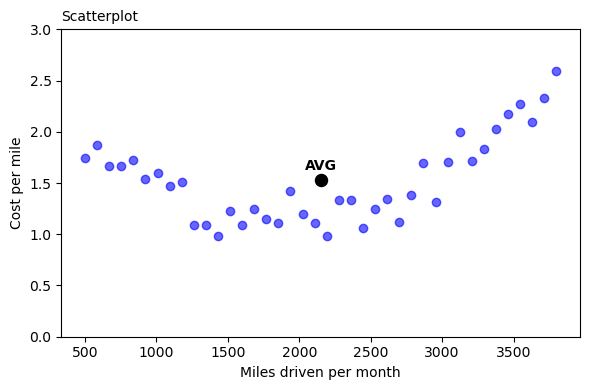

In [73]:
import matplotlib.pyplot as plt

#create synthetic data for visualization
np.random.seed(13)

x = np.linspace(500, 3800, 40)
y = 2.5 - 0.0015*x + 0.0000004*x**2 + np.random.normal(0, 0.15, size=x.shape)

#calculate average point
avg_x = np.mean(x)
avg_y = np.mean(y)

#create plot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='blue', alpha=0.6)
plt.scatter(avg_x, avg_y, color='black', s=75)
plt.text(avg_x, avg_y + 0.1, 'AVG', ha='center', fontweight='bold')

#labels
plt.xlabel('Miles driven per month')
plt.ylabel('Cost per mile')
plt.ylim(0, 3)
plt.title('Scatterplot', loc='left', fontsize=10)
plt.grid(False)

plt.tight_layout()
plt.show()